# \[TS\] HW01

김보람  
2023-10-10

> 해당 자료는 전북대학교 이영미 교수님 2023고급시계열분석 자료임

# import

In [189]:
library(lubridate)
library(ggplot2)
library(car)
#library(forecast)
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



# 1

다음은 어느 서점에서 최근 10 일동안 판매된 경제 서적의 일별 판매액 (단위
: 만원)을 나타내는 시계열 자료이다. 이 자료에 상수평균모형을 적합시키려
한다.

| k     | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   | 10  |
|-------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| $Z_t$ | 52  | 46  | 46  | 52  | 50  | 50  | 48  | 45  | 41  | 53  |

## (1)

상수평균모형을 적합하여라.

상수평균모형 $Z_t = \beta_0 + \epsilon_t$

LSE: $\hat {\beta_0} = \bar{Z}=48.3$

In [138]:
z=c(52,46,46,52,50,50,48,45,41,53)

In [88]:
mean(z)

$\hat{Z_t} = \hat{\beta_0} = 48.3$

## (2)

미래값 $Z_{10+l}$ 에 대한 예측값 $\hat{Z}_{10}(l)$을 구하시오.
$(l = 1, 2, 3, 4, 5)$

> **note** 시점 n에서의 l-시차 후의 예측값:
> $\hat{Z_n(l)} = \hat{\beta_0} = \bar{Z}$

$\hat{Z}_{10}(1)=\hat{Z}_{10}(2)=\hat{Z}_{10}(3)=\hat{Z}_{10}(4)=\hat{Z}_{10}(5)=48.3$

## (3)

미래값 $Z_{10+l}, l = 1, 2, 3, 4, 5$에 대한 95% 예측구간을 구하고,
예측값 및 예측구간의 하한값과 상한값을 관측값 $Z_t$의 시계열과 함께
표시하여라.

> **note** $Z_{n+l}$의 $100(1-\alpha)$% 예측 구간:
> $\bar{Z} \pm t_{\alpha/2}(n-1) \times \sqrt{(1+\frac{1}{n})s^2}$

In [89]:
qt(0.975,9)

In [90]:
mean_z <- mean(z)
n <- length(z)
df <- n - 1
sample_variance <- sum((z - mean_z)^2) / df

In [91]:
sample_variance

In [92]:
t_critical

In [93]:
sqrt( 1.1 * 14.46 )

In [154]:
lwr <- 48.3-2.26*3.98823269130576
upr <- 48.3+2.26*3.98823269130576


In [166]:
lwr <- 39.286594117649
upr <- 57.313405882351

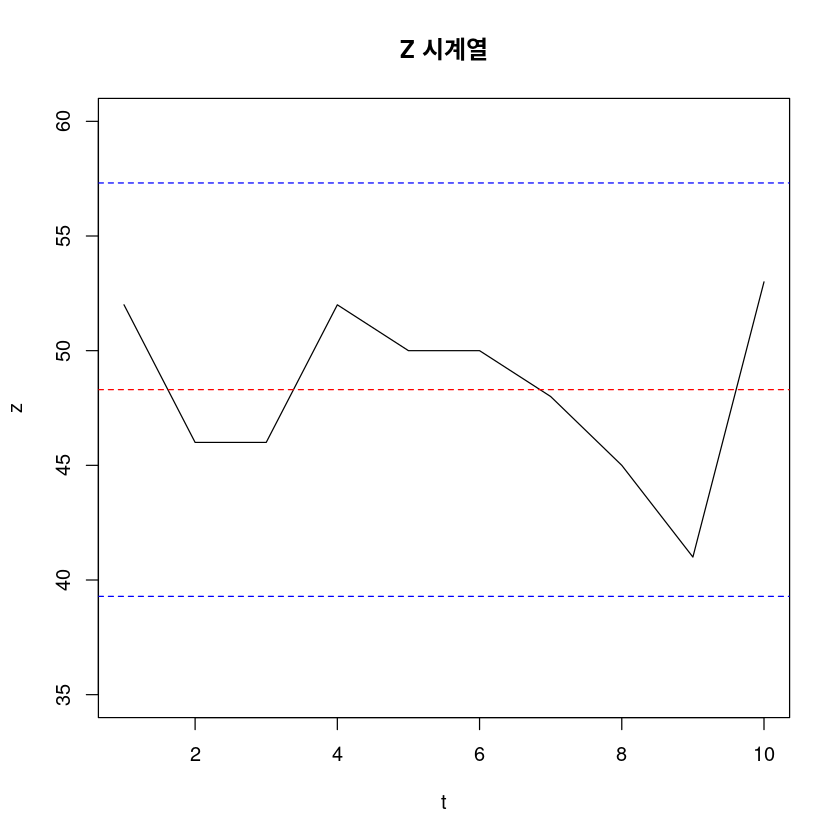

In [168]:
t <- c(1:10)
plot(t,z, type='l',  xlab = "t", ylab = "z", main = "Z 시계열", ylim=c(35,60))
abline(h=mean_z, col="red", lty=2)
abline(h = lwr, col = "blue", lty = 2)
abline(h = upr, col = "blue", lty = 2)

# 2

다음은 신장개업한 어느 편의점의 15 주간 주별 매출액을 나타낸
시계열자료이다. 이 자료에 선형추세모형을 적합시키려 한다.

| k     | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   | 10  | 11  | 12  | 13  | 14  | 15  |
|-------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| $Z_t$ | 303 | 298 | 303 | 314 | 303 | 314 | 310 | 324 | 317 | 327 | 323 | 324 | 331 | 330 | 332 |

## (1)

선형추세모형을 쓰시오.

In [99]:
z <- c(303,298,303,314,303,314,310,324,317,327,323,324,331,330,332)

In [100]:
t <- 1:15
df <- data.frame(t, z)
reg <- lm(z~t, data=df)
summary(reg)

> **note**
> $Z_t=\beta_0+\beta_1 t + \epsilon_t, \epsilon_t \sim N(0,\sigma^2), i.i.d$

## (2)

최소제곱법에 의하여 구한 $β_0, β_1$의 추정량이 각각 다음과 같아짐을
보여라.

$$\hat{\beta_0} = \frac{2(2n+1)}{n(n-1)} \sum_{t=1}^n Z_t - \frac{6}{n(n-1)} \sum_{t=1}^n t_t$$

$$\hat{\beta_1} = \frac{12}{n(n^2-1)} \sum_{t=1}^n t Z_t - \frac{6}{n(n-1)} \sum_{t=1}^n Z_t$$

$Z_t = \beta_0 + \beta_1 t + \epsilon_t$

최소제곱법을 통해 $\beta$값 추정하자.

$S = \sum_{t=1}^n \epsilon_t^2 = \sum_{t=1}^n(Z_t-\beta_0-\beta_1t)^2$

$\dfrac{\delta S}{\delta \beta_0}=\sum_{t=1}^n (Z_t-\beta_0 -\beta_1t)(-1)=0$ -
(a)라고 하자

$\dfrac{\delta S}{\delta \beta_1}=\sum_{t=1}^n (Z_t-\beta_0 -\beta_1t)(-t)=0$
-(b)라고 하자.

(a)식을 $\beta_0$에 관하여 풀면

$\sum_{t=1}^n Z_t - n \hat{\beta}_0 - \hat{\beta}_1 \sum_{t=1}^n t = 0$

$\hat{\beta}_0 = \dfrac{\sum_{t=1}^n Z_t -\hat{\beta}_1 \sum_{t=1}^n t }{n}= \dfrac{\sum_{t=1}^n Z_t}{n} - \hat{\beta}_1 \dfrac{(n+1)}{2}$
-(c)라고 하자

(b)식을 정리하면,

$\sum_{t=1}^n t Z_t = \hat{\beta}_0 \sum_{t=1}^n t + \hat{\beta}_1 \sum_{t=1}^n t^2=\hat{\beta}_0 \dfrac{n(n+1)}{2} + \hat{\beta}_1 \dfrac{n(n+1)(2n+1)}{6}$

(c)식을 (b)식에 대입 후 연립방정식을 풀자

$=\left( \dfrac{\sum_{t=1}^n Z_t}{n} - \hat{\beta}_1 \dfrac{(n+1)}{2} \right) \dfrac{n(n+1)}{2} + \hat{\beta}_1 \dfrac{n(n+1)(2n+1)}{6}$

$=\dfrac{(n+1)}{2} \sum_{t=1}^n Z_t + \hat{\beta}_1 \left( \dfrac{2n(n+1)(2n+1) -3n(n+1)^2}{12} \right)$

$=\dfrac{(n+1)}{2} \sum_{t=1}^n Z_t + \hat{\beta}_1 \left( \dfrac{n(n+1)(n-1)}{12} \right)$

즉
$\sum_{t=1}^n t Z_t =\dfrac{(n+1)}{2} \sum_{t=1}^n Z_t + \hat{\beta}_1 \left( \dfrac{n(n+1)(n-1)}{12} \right)$

$\hat{\beta}_1 \left( \dfrac{n(n+1)(n-1)}{12} \right) = \sum_{t=1}^n t Z_t - \dfrac{(n+1)}{2} \sum_{t=1}^n Z_t$

$\hat{\beta_1} = \frac{12}{n(n^2-1)} \sum_{t=1}^n t Z_t - \frac{6}{n(n-1)} \sum_{t=1}^n Z_t$

$\hat{\beta}_1$ 값 (c)식에 대입

$\hat{\beta}_0 = \dfrac{\sum_{t=1}^n Z_t}{n} - \hat{\beta}_1 \dfrac{(n+1)}{2}$

$=\dfrac{\sum_{t=1}^n Z_t}{n} - \dfrac{6}{n(n-1)} \sum_{t=1}^n tZ_t + \dfrac{3(n+1)}{n(n-1)} \sum_{t=1}^n Z_t$

$=\dfrac{2(2n+1)}{n(n-1)} \sum_{t=1}^n Z_t - \dfrac{6}{n(n-1)} \sum_{t=1}^n t_t Z_t$

## (3)

선형추세모형을 적합하시오. (회귀계수 추정 및 모형 결과 설명)

$\hat{Z}_t=\hat{\beta_0}+\hat{\beta_1}t = 297.7714 + 2.3786 t$

위 (2)식에 대입하기

t가 1씩 증가할수록 해당 편의점의 매출액은 2.38만큼 증가한다.

## (4)

미래값 $Z_{15+l}$ 에 대한 예측값 $\hat {Z}_{15}(l)$을 구하시오.
$(l = 1, 2, 3, 4, 5)$

`-` 손게산 하는 방법

$\hat{Z}_{n}(l) = \hat{\beta}_0 + \hat{\beta}_1(n+l)$

In [101]:
beta0 =297.78

In [102]:
beta1=2.38

In [103]:
beta0 + beta1 * 16

In [104]:
beta0 + beta1 * 17

In [105]:
beta0 + beta1 * 18

In [106]:
beta0 + beta1 * 19

In [107]:
beta0 + beta1 * 20

`-` 코드

In [108]:
new_data <- data.frame(
     t = 16:20,
     y = as.factor(1:5)
     )
new_data

In [109]:
t <-c(1:15)
data <- data.frame(t, z)

In [110]:
m <- lm(z~t, data=data)
summary(m)

In [111]:
predict(m, newdata = new_data)

# 3

(R 실습) 다음과 같은 시계열모형으로부터 모의시계열자료
$\{Z_t, t = 1, 2, . . . , 100 \}$을 생성한 후 4개의 시계열그림을 겹쳐
그려보고 비교하여라. 그리고 각 모의시계열자료의 표본평균과 표본분 산을
구하고, 이론적인 평균 및 분산과 비료하여라.

## (1)

$Z_t = 100 + ϵ_t$, 단 $ϵ_t$는 서로 독립이고 $N(0, 1)$ 분포를 따른다.

In [112]:
z1 <- 100 + rnorm(100)

$E(Z_t)=E(100+\epsilon_t) = 100 + E(\epsilon_t) = 100 + 0 = 100$

$Var(Z_t) = Var(100+\epsilon_t) = Var(\epsilon_t) = 1 = 1$

## (2)

$Z_t = 500 + ϵ_t$, 단 $ϵ_t$는 서로 독립이고 $N(0, 1)$ 분포를 따른다.

In [113]:
z2 <- 500 + rnorm(100)

$E(Z_t)=E(500+\epsilon_t) = 500 + E(\epsilon_t) = 500 + 0 = 500$

$Var(Z_t) = Var(500+\epsilon_t) = Var(\epsilon_t) = 1 = 1$

## (3)

$Z_t = 100 + ϵ_t$, 단 $ϵ_t$는 서로 독립이고 $N(0, 100)$ 분포를 따른다.

In [114]:
z3 <- 100 + rnorm(100, 0, 10)

$E(Z_t)=E(100+\epsilon_t) = 100 + E(\epsilon_t) = 100 + 0 = 100$

$Var(Z_t) = Var(100+\epsilon_t) = Var(\epsilon_t) = 100 = 100$

## (4)

$Z_t = 100 + tϵ_t$, 단 $ϵ_t$는 서로 독립이고 $N(0, 1)$ 분포를 따른다.

In [117]:
z4 <- 100 + t * rnorm(100)

$E(Z_t)=E(100+ t \epsilon_t) = 100 + t E(\epsilon_t) = 100 + t 0 = 100$

$Var(Z_t) = Var(100+ t \epsilon_t) = Var(t \epsilon_t) = t^2 Var(\epsilon_t) = t^2 \times 1 = t^2$

## 2 풀이

In [118]:
t <- 1:100
df <- data.frame(t,z1,z2,z3,z4)

`-` ggplot

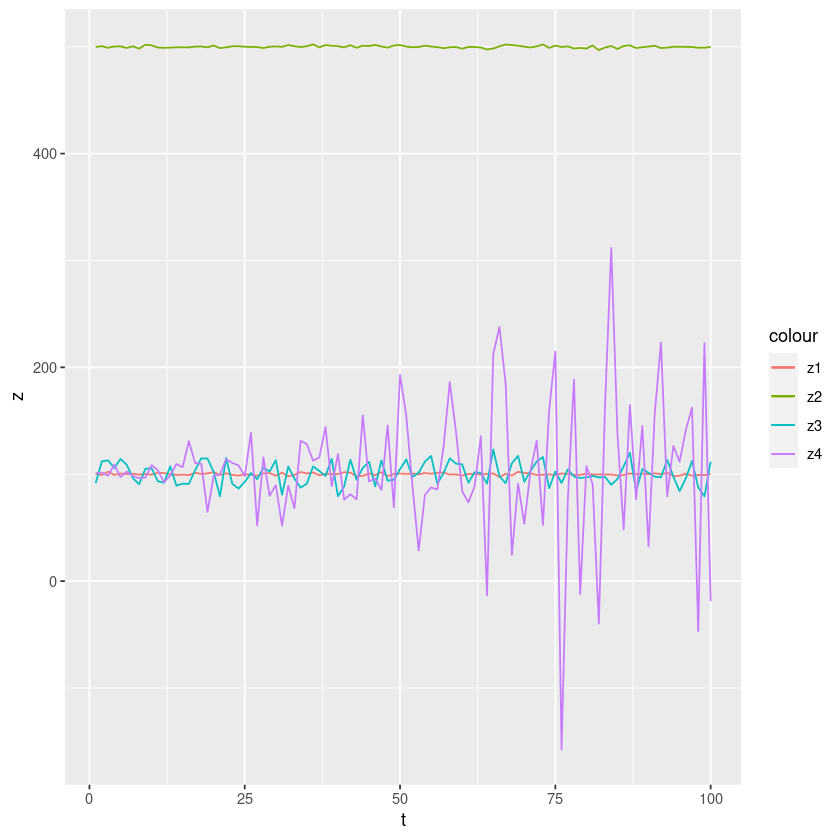

In [119]:
ggplot(data=df, aes(t)) + 
  geom_line(aes(y=z1, colour='z1')) + 
  geom_line(aes(y=z2, colour='z2')) + 
  geom_line(aes(y=z3, colour='z3')) + 
  geom_line(aes(y=z4, colour='z4')) +
  ylab('z')

`-` plot

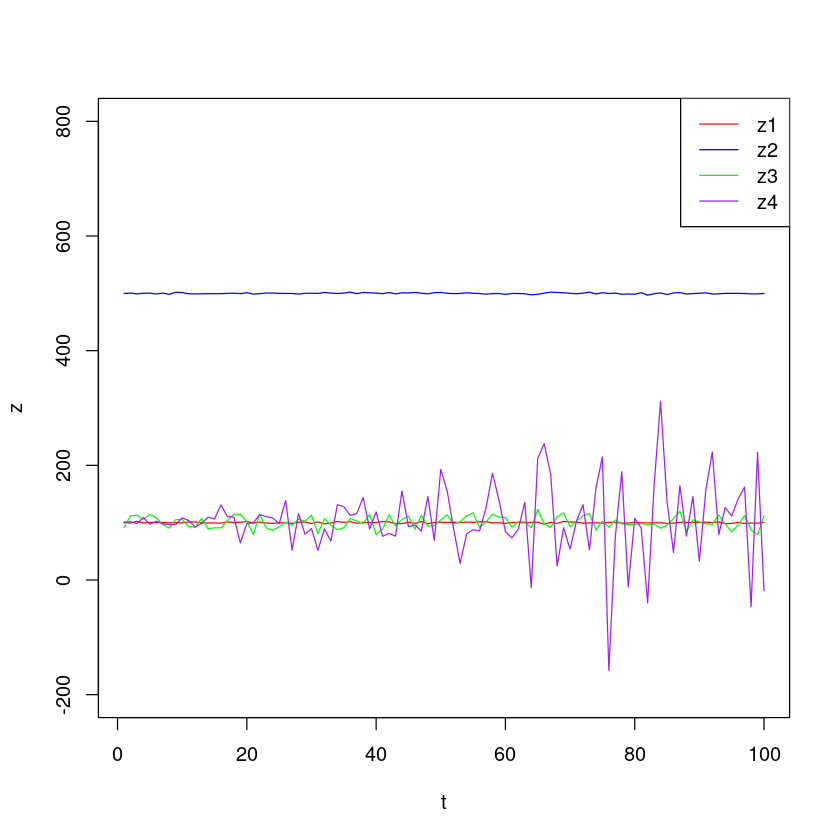

In [120]:
plot(df$t, df$z1, type = 'l', col = 'red', xlab = 't', ylab = 'z', ylim=c(-200,800))
lines(df$t, df$z2, col = 'blue')
lines(df$t, df$z3, col = 'green')
lines(df$t, df$z4, col = 'purple')
legend('topright', legend = c('z1', 'z2', 'z3', 'z4'), col = c('red', 'blue', 'green', 'purple'), lty = 1)

# 4

(R 실습) 다음과 같은 시계열모형으로부터 모의시계열자료
$\{Z_t, t = 1, 2, . . . , 100 \}$을 생성한 후 $Z_t$와 $E(Z_t)$의
시계열그림을 겹쳐 그려라. 또한 이 시계열 자료들은 각각 어떤 성분으로
구성되어 있는지 설명하여라. 단 오차항 $ϵ_t$는 서로 독립인 $N(0, 1)$
분포를 가정한다.

## (1)

$Z_t = 100 + ϵ_t$

상수평균모형: 불규칙성분만을 갖는 경우

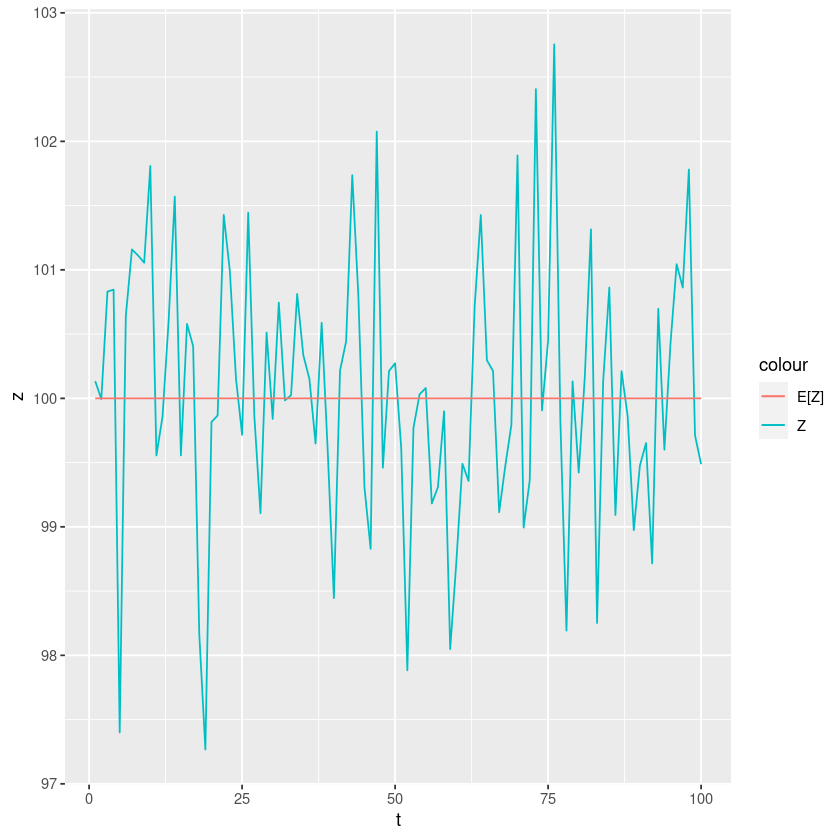

In [121]:
t <- 1:100
e <- rep(100, 100)
z <- 100 + rnorm(100)
df <- data.frame(t, e, z)
ggplot(data=df, aes(t)) + geom_line(aes(y=z, colour="Z")) + geom_line(aes(y=e, colour="E[Z]"))

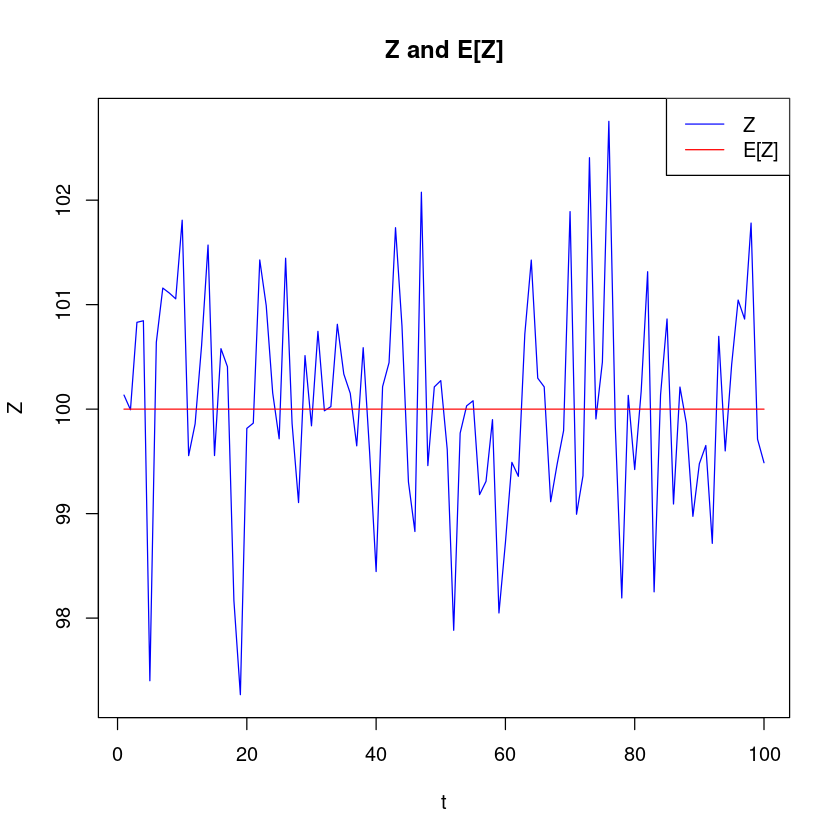

In [122]:
plot(df$t, df$z, type="l", col="blue", xlab="t", ylab="Z", main="Z and E[Z]")
lines(df$t, df$e, col="red")
legend("topright", legend=c("Z", "E[Z]"), col=c("blue", "red"), lty=1)

## (2)

$Z_t = 100 + t + ϵ_t$

선형추세모형: 직선형인 추세를 가지고 증가

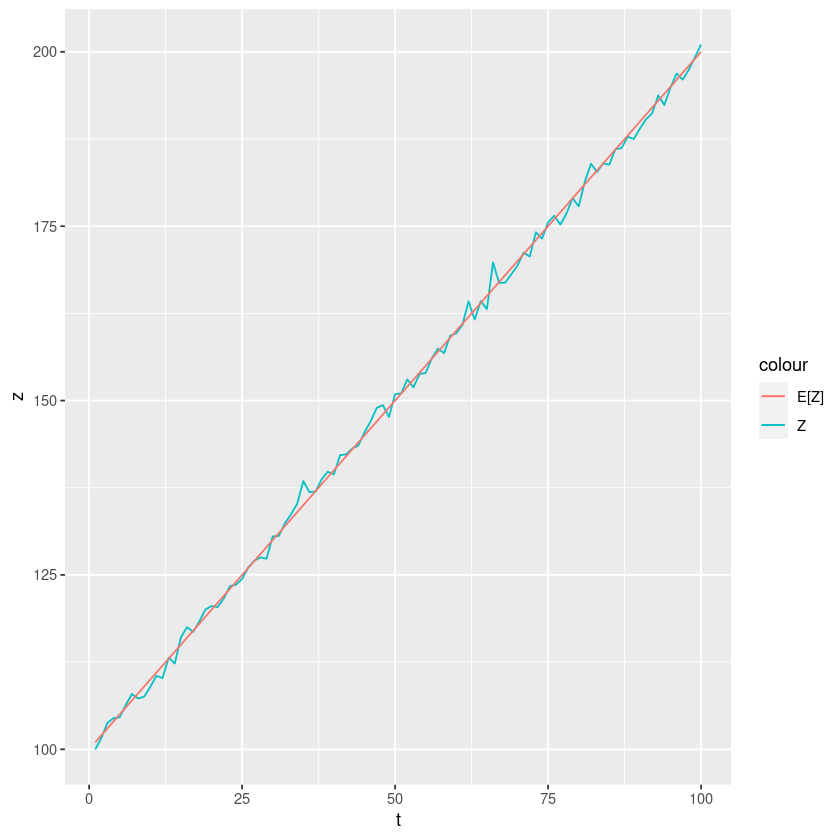

In [123]:
t <- 1:100
e <- 100 + t
z <- 100 + t + rnorm(100)
df <- data.frame(t, e, z)
ggplot(data=df, aes(t)) + geom_line(aes(y=z, colour="Z")) + geom_line(aes(y=e, colour="E[Z]"))


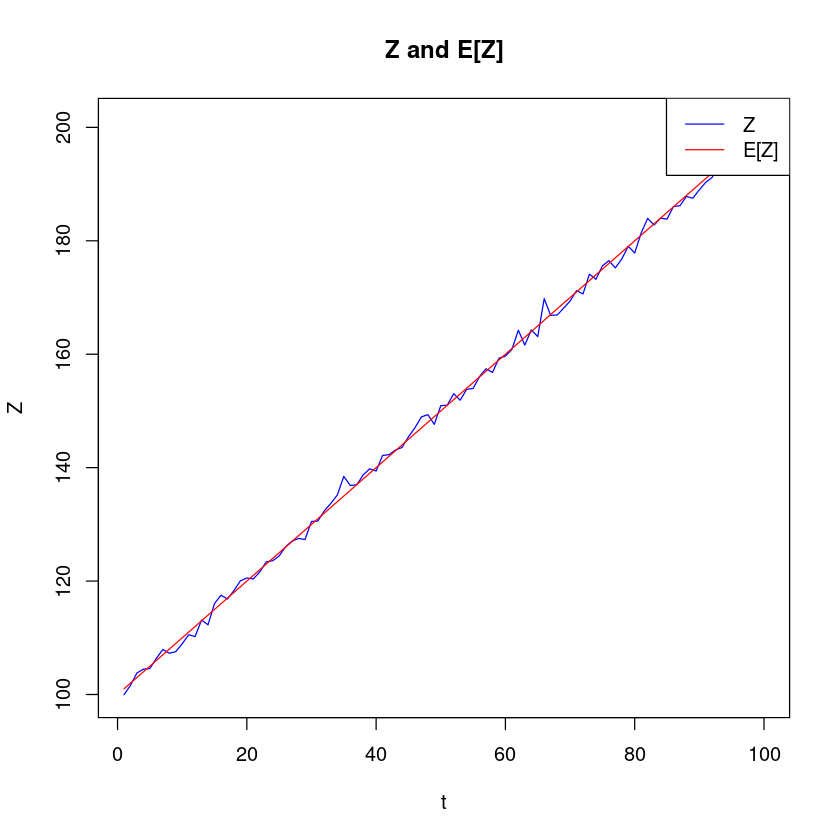

In [124]:
plot(df$t, df$z, type="l", col="blue", xlab="t", ylab="Z", main="Z and E[Z]")
lines(df$t, df$e, col="red")
legend("topright", legend=c("Z", "E[Z]"), col=c("blue", "red"), lty=1)

## (3)

$Z_t = 100 + 0.3t + sin \left( \frac{2πt}{12} \right)+ cos \left(\frac{2πt}{12} \right) + ϵ_t$

선형계절추세모형: 추세 및 계절 성분을 가진다..

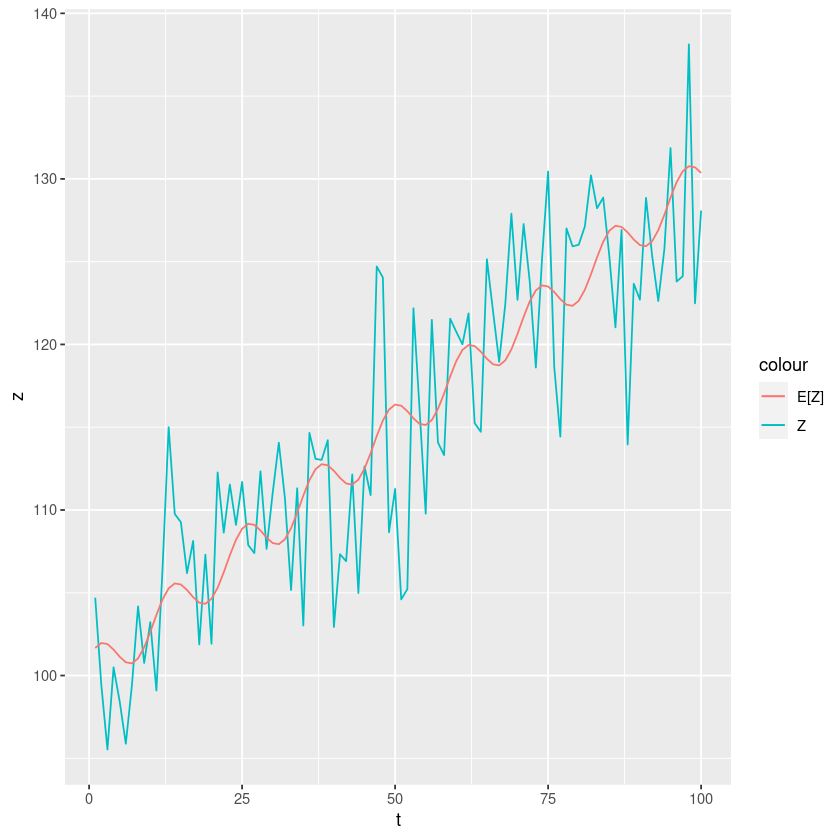

In [125]:
t <- 1:100
e <- 100 + 0.3*t + sin(2*pi*t/12) + cos(2*pi*t/12)
z <- 100 + 0.3*t + sin(2*pi*t/12) + cos(2*pi*t/12) + rnorm(100, 0, 5)
df <- data.frame(t, e, z)
ggplot(data=df, aes(t)) + geom_line(aes(y=z, colour="Z")) + geom_line(aes(y=e, colour="E[Z]"))


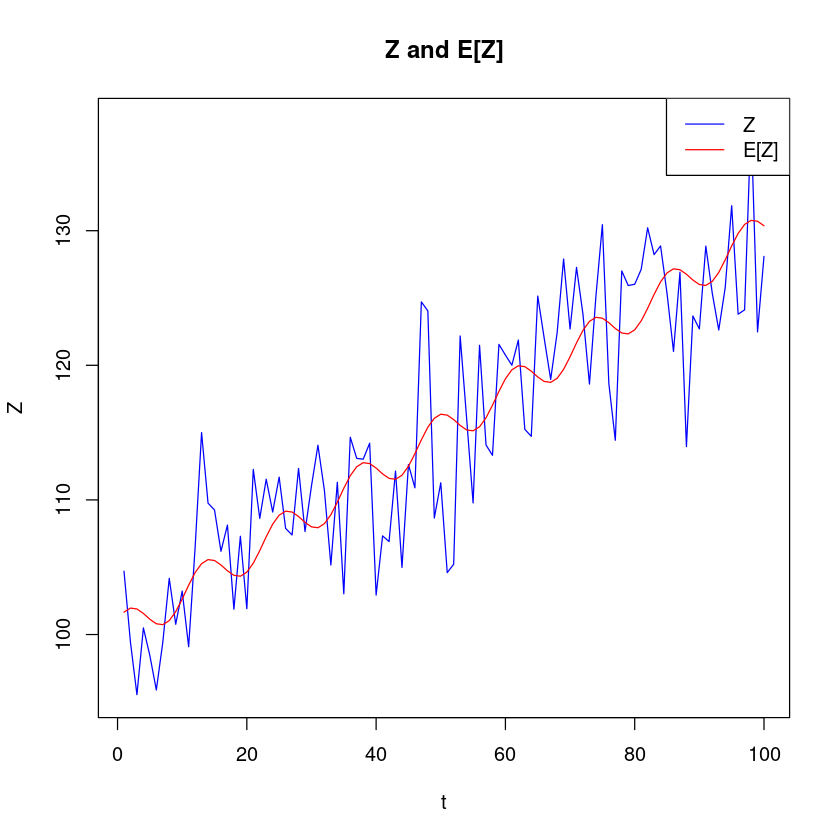

In [126]:
plot(df$t, df$z, type="l", col="blue", xlab="t", ylab="Z", main="Z and E[Z]")
lines(df$t, df$e, col="red")
legend("topright", legend=c("Z", "E[Z]"), col=c("blue", "red"), lty=1)

# 5

(R 실습) “book.txt”는 한 서점에서 첫 30일동안 팔린 어느 베스트셀러의
일별 판매 부수(단위 : 권) 시계열자료이다.

## (1)

시계열 그림을 그리시오.

In [297]:
book <- scan("book.txt")
length(book)
head(book)

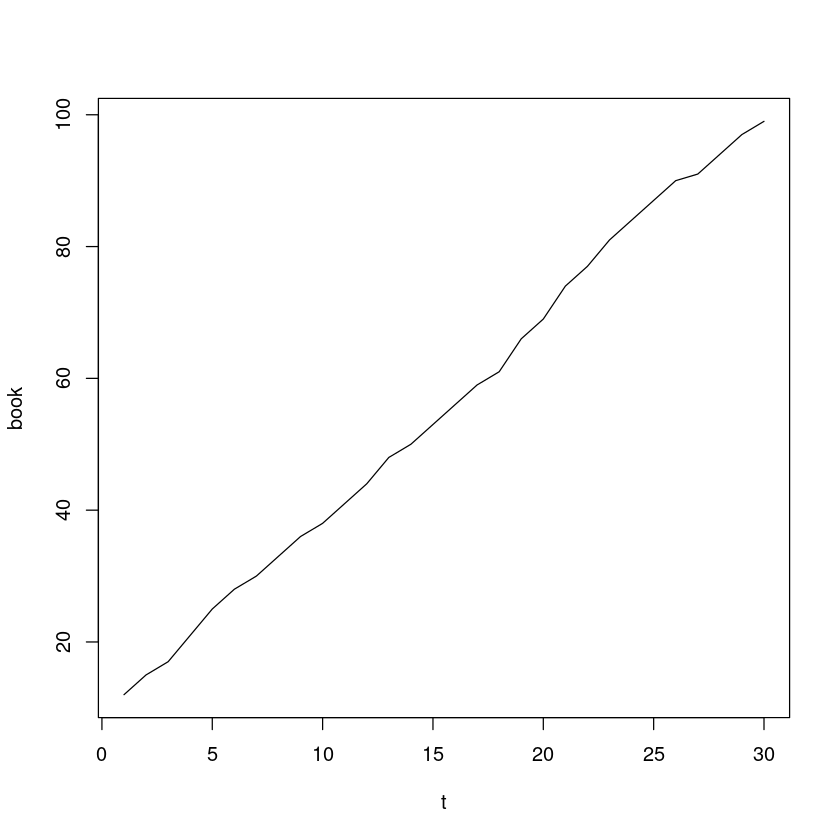

In [298]:
t <- 1:30
plot(t, book, type='l')

## (2)

이 시계열 자료는 어떤 성분으로 구성되어 있는지 설명하시오.

선형 추세 모형

## (3)

적절한 추세모형을 적합하여라.

In [299]:
data <- data.frame(t, book)

In [300]:
m <- lm(book~t, data=data)
summary(m)

$\hat{Z}_t = 8.19080 + 3.07586 t$

### 잔차분석

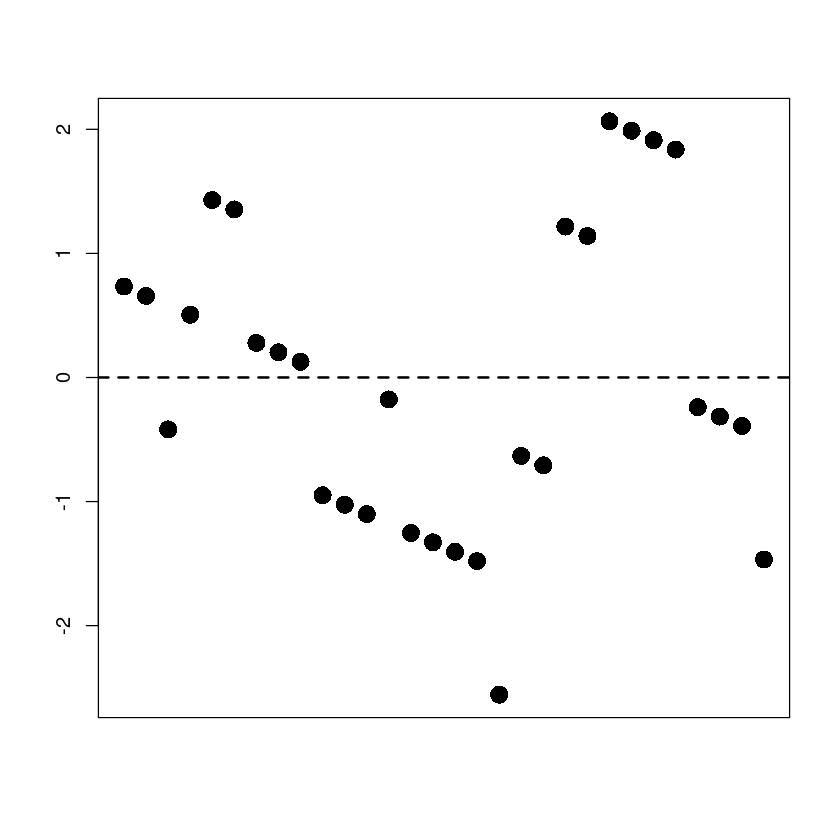

In [301]:
plot(t,resid(m),
     pch=16, cex=2, xaxt='n',
     xlab="", ylab="", cex.main=2)
abline(h=0, lty=2, lwd=2)

### 독립성검정

In [302]:
dwtest(m,alternative = "two.sided")

### 정규분포검정

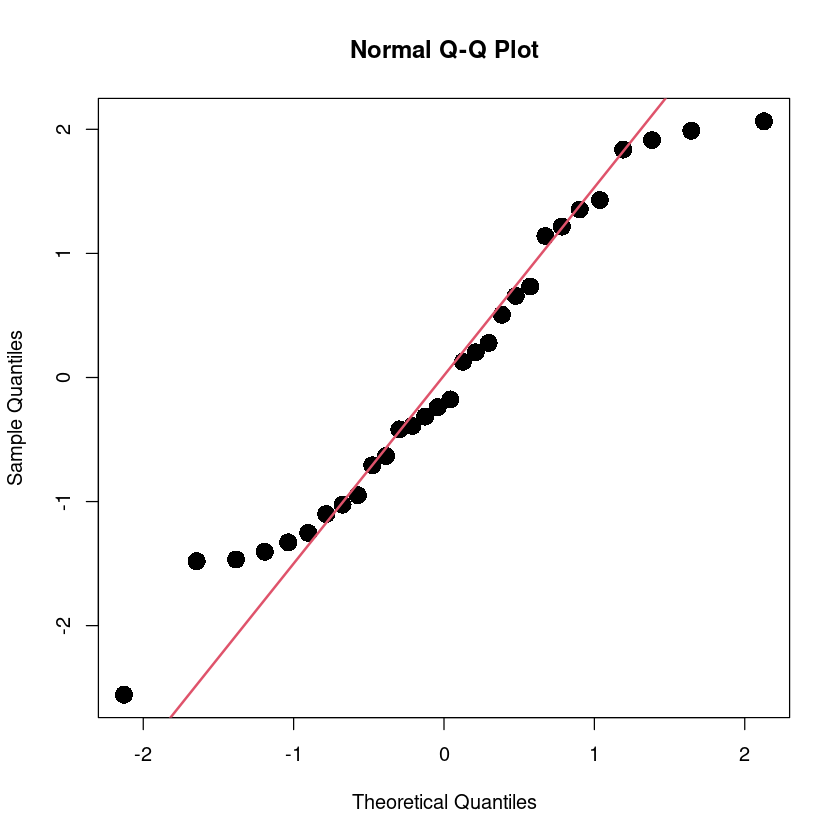

In [303]:
qqnorm(resid(m), pch=16, cex=2)
qqline(resid(m), col = 2, lwd=2)


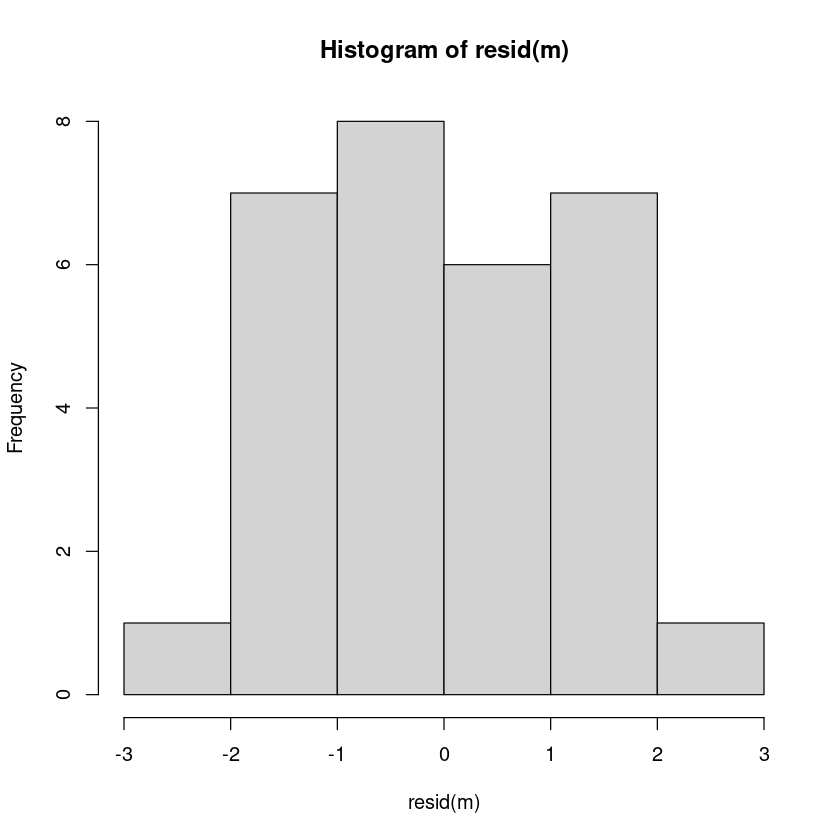

In [304]:
hist(resid(m))

In [305]:
shapiro.test(resid(m))

### 등분산성검정

In [306]:
bptest(m)

## (4)

마지막 관측값으로 부터 $Z_{n+l}$ 에 대한 예측값 $\hat{Z}_n (l)$을
구하시오. $(n = 30, l = 1, 2, . . . , 12)$

In [131]:
new_data <- data.frame(
     t = 31:42,
     y = as.factor(1:12)
     )
new_data

In [132]:
predict(m, newdata = new_data)

## (5)

마지막 관측값으로 부터 $Z_{n+l}(n = 30, l = 1, 2, . . . , 12)$에 대한
95% 예측구간을 구하여라

In [133]:
predict_result <- as.data.frame(predict(m, newdata = new_data, interval = "predict",level=0.95))
predict_result

## (6)

예측값 및 예측구간의 하한값과 상한값을 관측값 $Z_t$의 시계열과 함께
표시하여라.

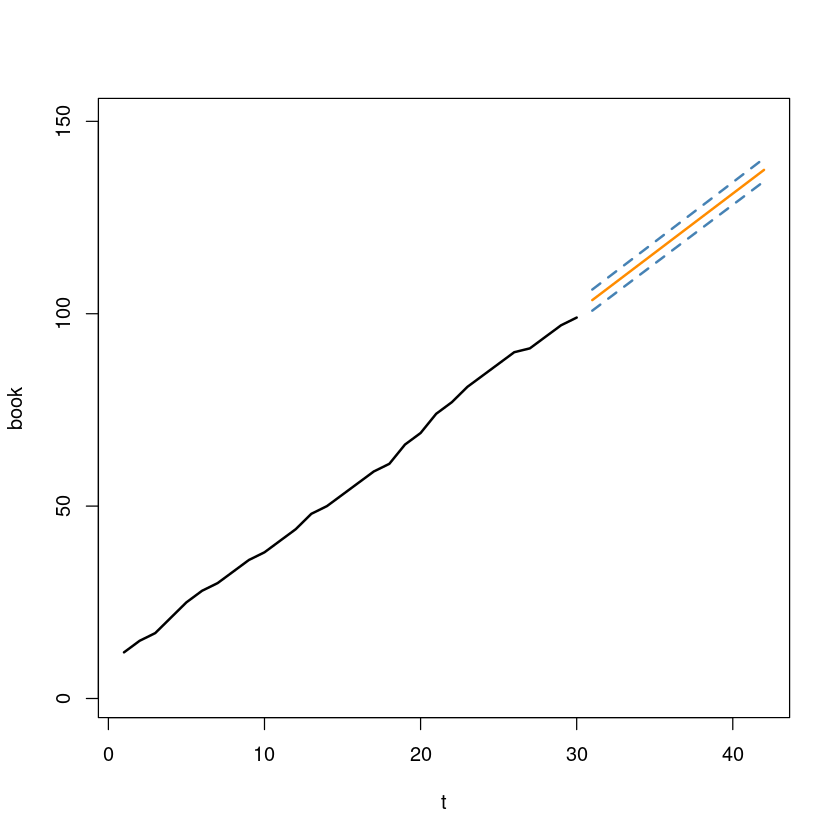

In [134]:
plot(data$book~data$t, data,
     xlab = "t", ylab = "book",
     xlim=c(1,42),
     ylim=c(1,150),
     type='l',
     lwd=2)
lines(31:42, predict_result$fit, col='darkorange', lwd=2)
lines(31:42, predict_result$lwr, col='steelblue', lwd=2, lty=2)
lines(31:42, predict_result$upr, col='steelblue', lwd=2, lty=2)

# 6

(R 실습) “export.txt”는 월별수출액(단위:억\$) 시계열자료이다.

## (1)

시계열 그림을 그리시오.

In [281]:
export <- scan("export.txt")
length(export)
head(export)

### ts함수 사용하여 plot (1980년 1월은 임의로 설정함)

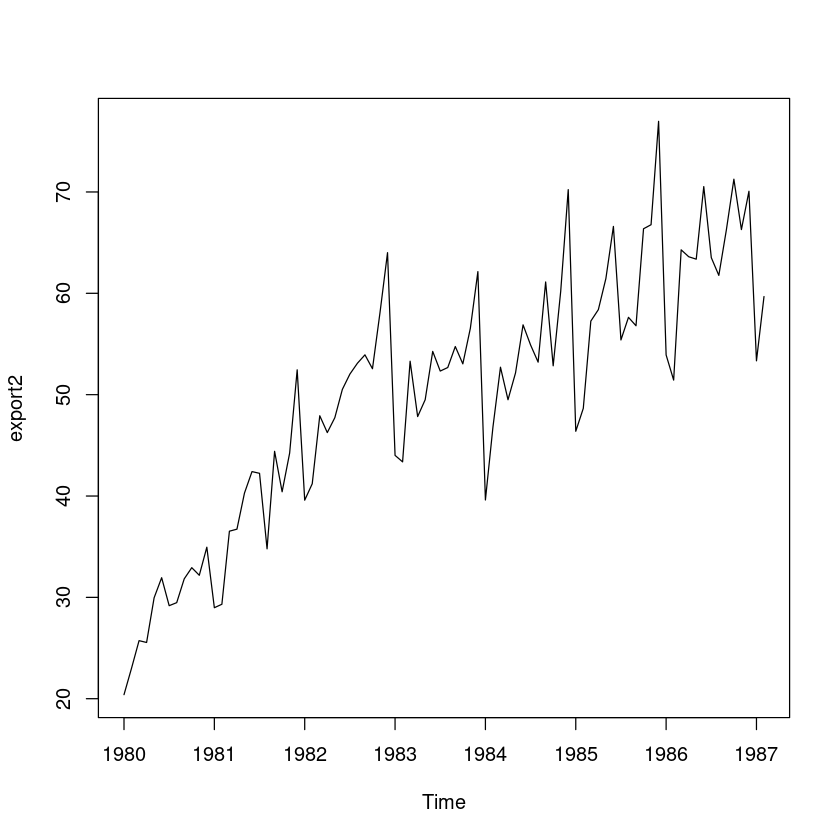

In [282]:
export2 <- ts(export, frequency=12, start=c(1980,1))
plot(export2)

### plot

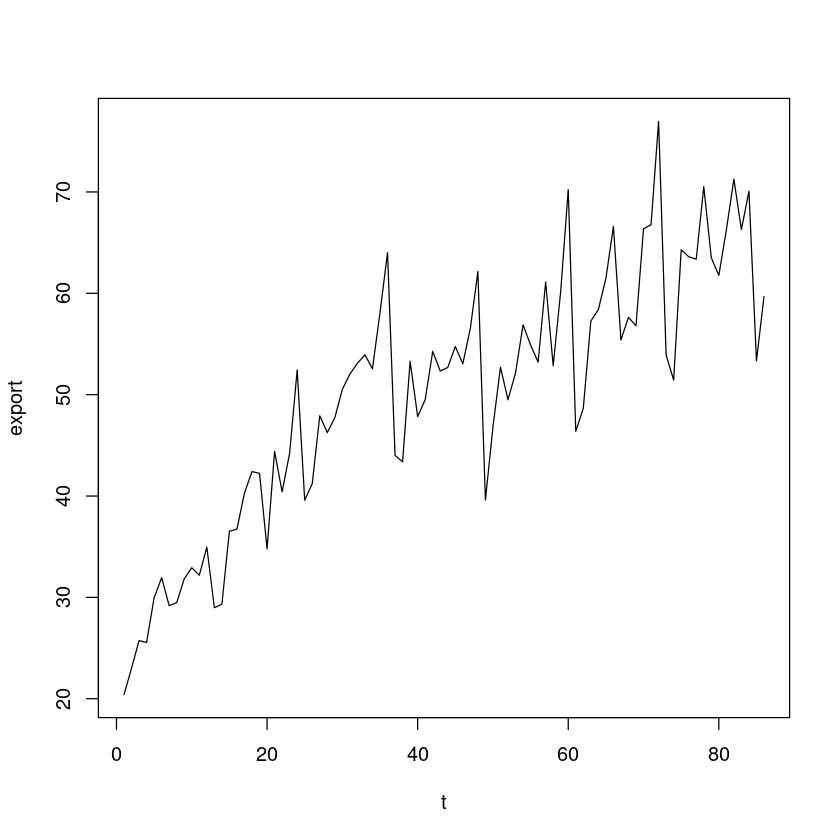

In [283]:
t <- 1:length(export)
plot(t, export, type='l')

## (2)

이 시계열 자료는 어떤 성분으로 구성되어 있는지 설명하시오.

선형 계절 추세 모형

## (3)

적절한 추세모형을 적합하여라. (지시함수 사용)

이분산성이 있어보이니 로그변환 실시

In [284]:
tmp.data <- data.frame(
 day = seq(ymd("1984-01-01"),
 by='1 month', length.out=length(export)),
 export=export
)
tmp.data$lnex <- log(export) #로그변환
tmp.data$y <- as.factor(as.integer(cycle(export2))) #지시함수로 사용할 주기
tmp.data$trend <- 1:length(export)

In [285]:
head(tmp.data)

### 제약조건 beta1=0

In [286]:
reg <- lm(lnex ~ trend + y, tmp.data)      
summary(reg)

`-` 제약조건 $\beta_1=0$

-   s2는 1월보다 0.0449215만큼 더 팔리고

-   s3는 1월보다 0.0449215만큼 더 팔린다.

s2는 유의하지 않게 나왔는데 이는 1월과 2월의 시간차이가 적기 때문이다.

### 제약조건 beta0=0

In [287]:
reg2 <- lm(lnex ~ 0+trend+y, tmp.data)  # 제약조건에서 beta0=0으로 놓는다는 뜻. 절편을 0으로!      
summary(reg2)

### 제약조건 sum

In [288]:
reg3 <- lm(lnex ~ trend+y, tmp.data,
           contrast = list(y="contr.sum"))
summary(reg3)

## (4)

적합 결과를 설명하여라. (회귀계수의 의미 설명)

모형의 p-value값은 $<2.2e^{-16}$이므로 모형은 유의하고 $R^2$값도 85퍼의
설명력을 가진다. 각 회귀계수도 유의미하며, ..

In [289]:
head(data.frame(hat_y1 = fitted(reg),
                hat_y2 = fitted(reg2),
                hat_y3 = fitted(reg3)))

### 잔차분석

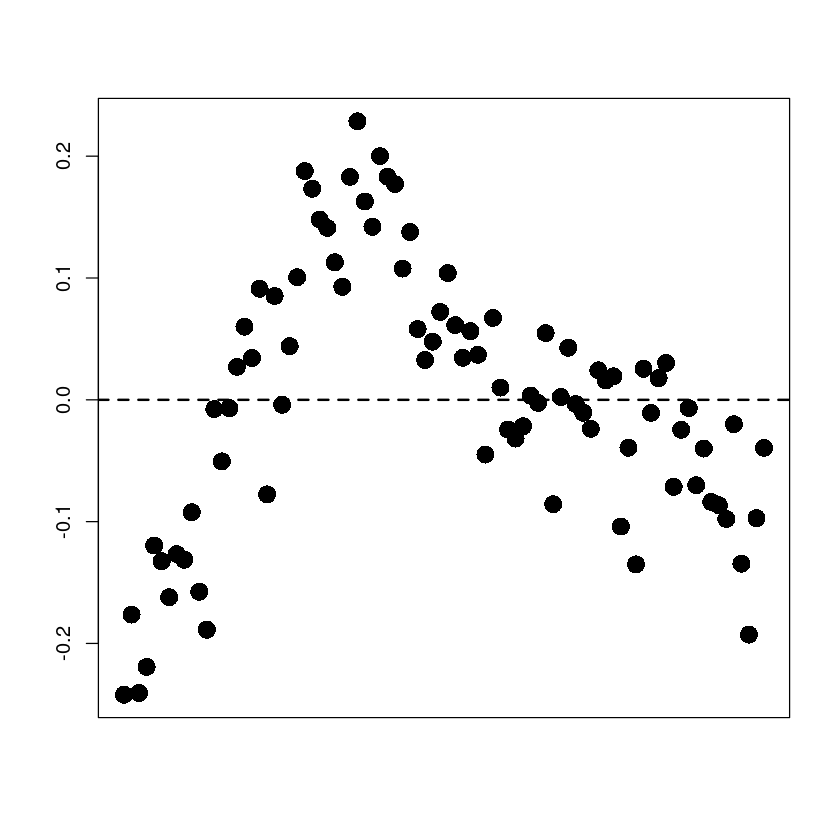

In [290]:
plot(tmp.data$trend,resid(reg),
     pch=16, cex=2, xaxt='n',
     xlab="", ylab="", cex.main=2)
abline(h=0, lty=2, lwd=2)

### 독립성검정

In [291]:
dwtest(reg,alternative = "two.sided")

### 정규분포검정

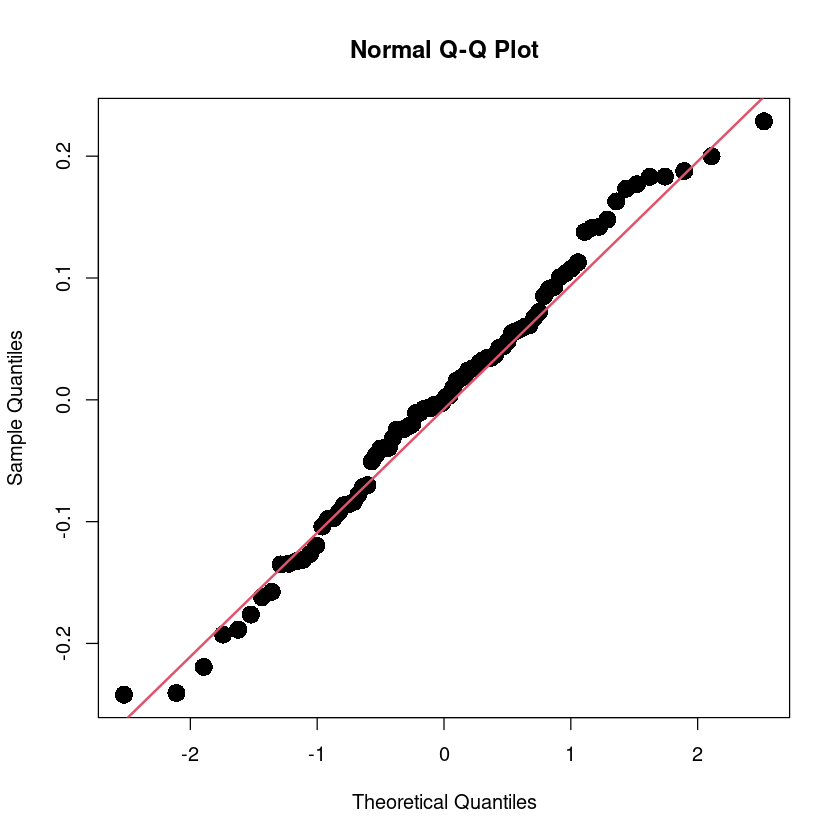

In [292]:
qqnorm(resid(reg), pch=16, cex=2)
qqline(resid(reg), col = 2, lwd=2)


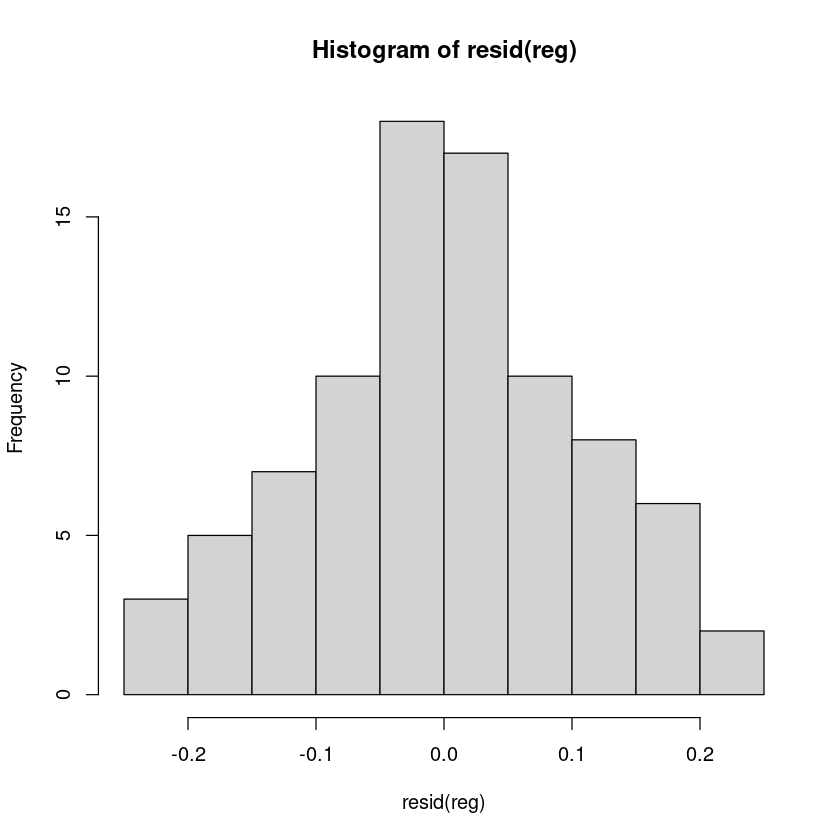

In [293]:
hist(resid(reg))

In [294]:
shapiro.test(resid(reg))

### 등분산성검정

In [295]:
bptest(reg)

## (5)

마지막 관측값으로 부터 $Z_{n+l}$ 에 대한 예측값 $\hat{Z}_n(l)$을
구하시오. $(n = 30, l = 1, 2, . . . , 12)$

> 문제 오류인듯? n=86이여야 하는 것 같다.

In [254]:
head(tmp.data)


In [270]:
new_data <- data.frame(
     trend = 87:98,
     y = as.factor(1:12)
     )
new_data

In [271]:
predict(reg, newdata = new_data)

In [272]:
exp(predict(reg, newdata = new_data))

## (6)

마지막 관측값으로 부터 $Z_{n+l}(n = 30, l = 1, 2, . . . , 12)$에 대한
95% 예측구간을 구하여라

In [273]:
predict_result <- as.data.frame(predict(reg, newdata = new_data, interval = "predict"))
predict_result

In [274]:
predict_result$fitted_dep <- exp(predict_result$fit)
predict_result$fitted_dep_l <- exp(predict_result$lwr)
predict_result$fitted_dep_u <- exp(predict_result$upr)
predict_result


## (7)

예측값 및 예측구간의 하한값과 상한값을 관측값 $Z_t$의 시계열과 함께
표시하여라.

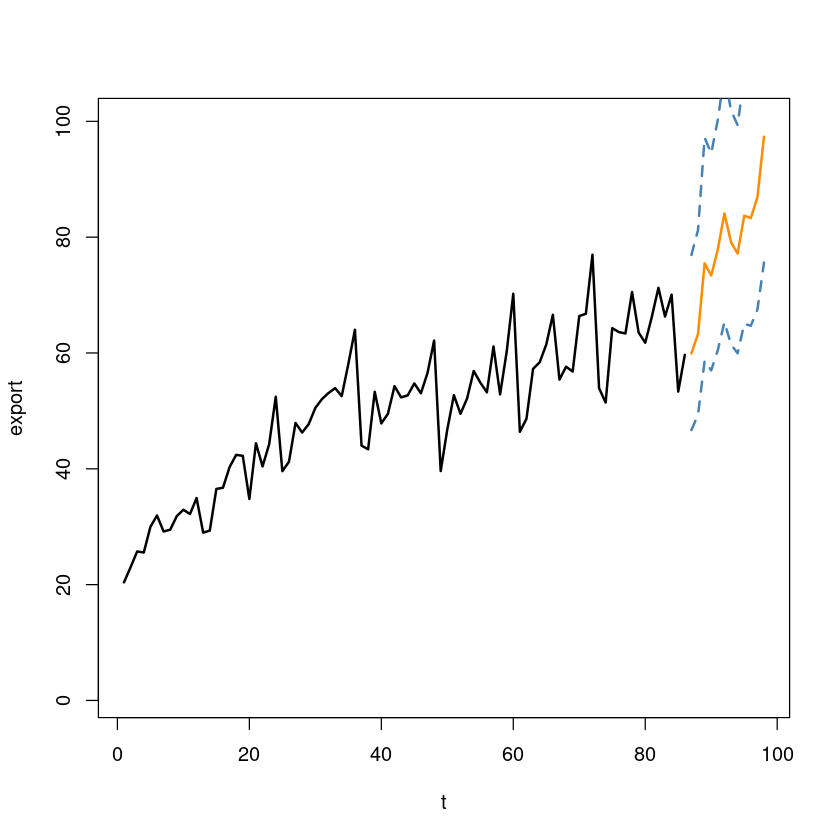

In [280]:
plot(export~tmp.data$trend, tmp.data,
     xlab = "t", ylab = "export",
     xlim=c(1,98),
     ylim=c(1,100),
     type='l',
     lwd=2)
lines(87:98, predict_result$fitted_dep, col='darkorange', lwd=2)
lines(87:98, predict_result$fitted_dep_l, col='steelblue', lwd=2, lty=2)
lines(87:98, predict_result$fitted_dep_u, col='steelblue', lwd=2, lty=2)